<a href="https://colab.research.google.com/github/Redhatt/MS-ML/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Redhatt/MS-ML
!ls -l

Cloning into 'MS-ML'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.
total 8
drwxr-xr-x 4 root root 4096 Apr 24 14:18 MS-ML
drwxr-xr-x 1 root root 4096 Apr 21 13:39 sample_data


In [2]:
! python -m pip install numpy scipy matplotlib tensorflow keras keras-visualizer pandas

In [3]:
# importing modules and libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers
# from keras_visualizer import visualizer
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sb

In [4]:
# loading data files
file1 = 'MS-ML/superconduct/train.csv'
file2 = 'MS-ML/superconduct/unique_m.csv'

In [94]:
# making parameter data frame and composition data frame

df_para_ = pd.read_csv(file1)
para = df_para_.columns.tolist()
# for k, i in enumerate(para,1):
#   print(f"{k}. {i}")

df_comp_ = pd.read_csv(file2)
comp = df_comp_.columns.tolist()
# for k, i in enumerate(comp,1):
#   print(f"{k}. {i}")

print('df_para_ size:', len(df_para_.columns), 'x', len(df_para_[df_para_.columns.tolist()[0]]))
print('df_comp_ size:', len(df_comp_.columns), 'x', len(df_comp_[df_comp_.columns.tolist()[0]]))

df_para_ size: 82 x 21263
df_comp_ size: 88 x 21263


In [95]:
# reducing data size 
top = 21263
df_para_ = df_para_.head(top)
df_comp_ = df_comp_.head(top)

In [96]:
# droping prediction parameter i.e. critical temperature
# also dropping matarial parameter from df_comp 

pred_para = 'critical_temp'

exclude_from_para = ['critical_temp']
exclude_from_comp = ['critical_temp', 'material']

temp = df_para_[pred_para].tolist()

df_para = df_para_.drop(exclude_from_para, axis=1)
df_comp = df_comp_.drop(exclude_from_comp, axis=1)

In [97]:
# converting data into numpy array from list, for better mathematical operations
temp = np.asarray(temp, dtype=np.float64)

data_para = []
for col in df_para:
  data_para.append(df_para[col].tolist()[:])
data_para = np.asarray(data_para, dtype=np.float64).T

data_comp = []
for col in df_comp:
  data_comp.append(df_comp[col].tolist()[:])
data_comp = np.asarray(data_comp, dtype=np.float64).T

print(f"shape of temperature: {temp.shape}")
print(f"shape of data_para  : {data_para.shape}")
print(f"shape of data_comp  : {data_comp.shape}")


shape of temperature: (21263,)
shape of data_para  : (21263, 81)
shape of data_comp  : (21263, 86)


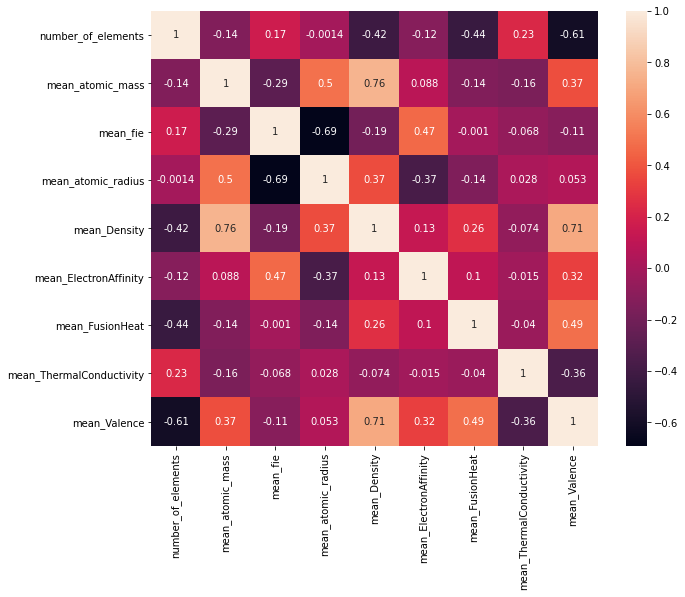

In [98]:
mean_para = ['number_of_elements',
              'mean_atomic_mass',
              'mean_fie',
              'mean_atomic_radius',
              'mean_Density',
              'mean_ElectronAffinity',
              'mean_FusionHeat',
              'mean_ThermalConductivity',
              'mean_Valence']

df_para_mean = df_para[mean_para]
corre = df_para_mean.corr()
figure = plt.figure()
figure.set_size_inches(10, 8)

sb.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns, annot=True)

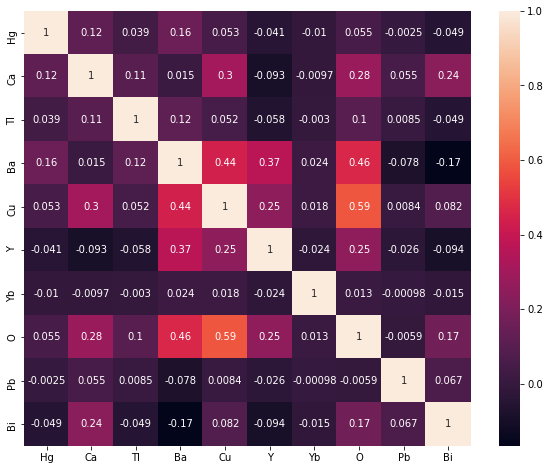

In [99]:
most_comp = ['Hg', 'Ca', 'Tl', 'Ba', 'Cu', 'Y', 'Yb', 'O', 'Pb', 'Bi']
df_comp_mean = df_comp[most_comp]
corre = df_comp_mean.corr()

figure = plt.figure()
figure.set_size_inches(10, 8)
sb.heatmap(corre, xticklabels=corre.columns, yticklabels=corre.columns, annot=True)

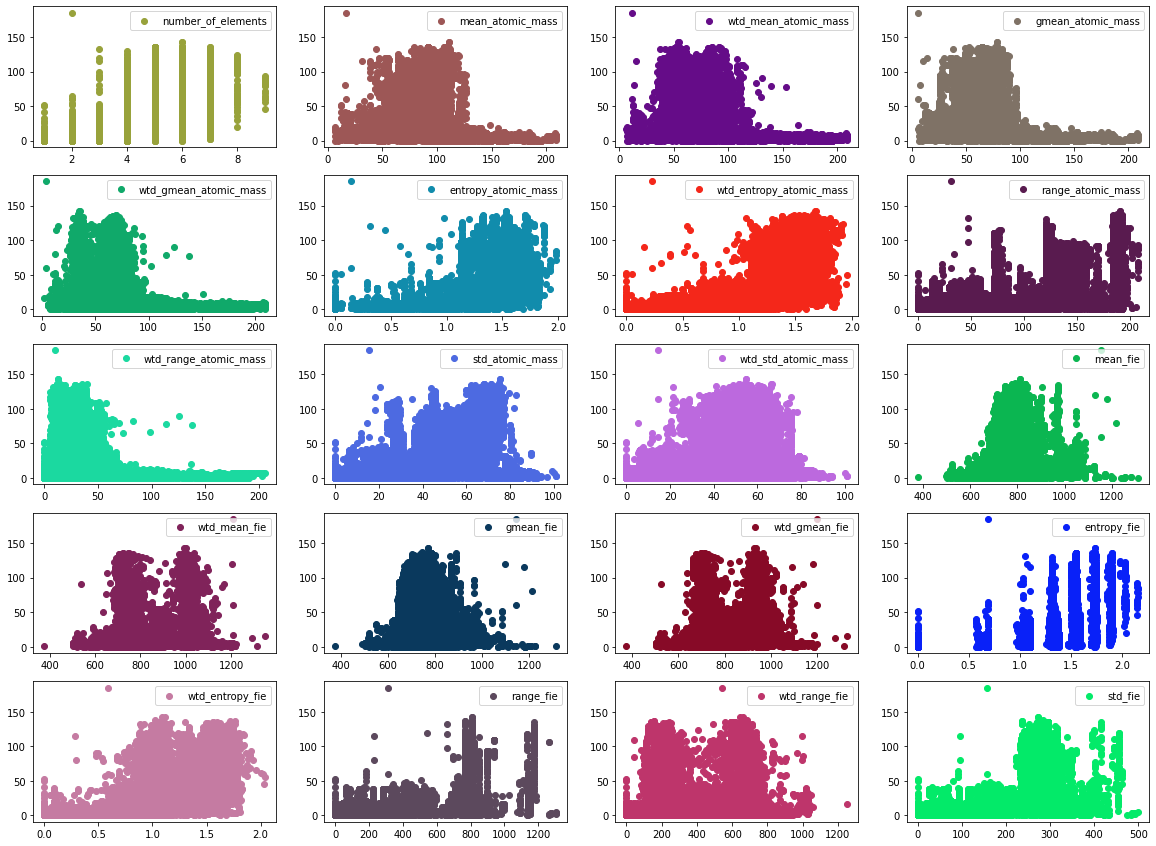

In [100]:
# ploting data 
# playing and looking for some relation among different parameters againest temp
def get_factors(a):
  if a>15:return a//4 + 1*(a%4 != 0), 4
  if a>8: return a//3 + 1*(a%3 != 0), 3
  if a>4: return a//2 + 1*(a%2 != 0), 2
  return a, 1


figure = plt.figure()
figure.set_size_inches(20, 15)

y_labels = pred_para
x_labels = para
xl_size = len(x_labels)

xl_size = min(20, xl_size)

row_count,col_count = get_factors(xl_size)

for i in range(row_count):
  for j in range(col_count):
    if col_count*i + j >= xl_size:
      break
    label = x_labels[col_count*i + j]
    plt.subplot2grid((row_count, col_count), (i,j))
    plt.scatter(df_para[label],temp, label=label, color=np.random.rand(3,))
    plt.legend(loc='upper right')

  if col_count*i + j >= xl_size:
      break
plt.show()

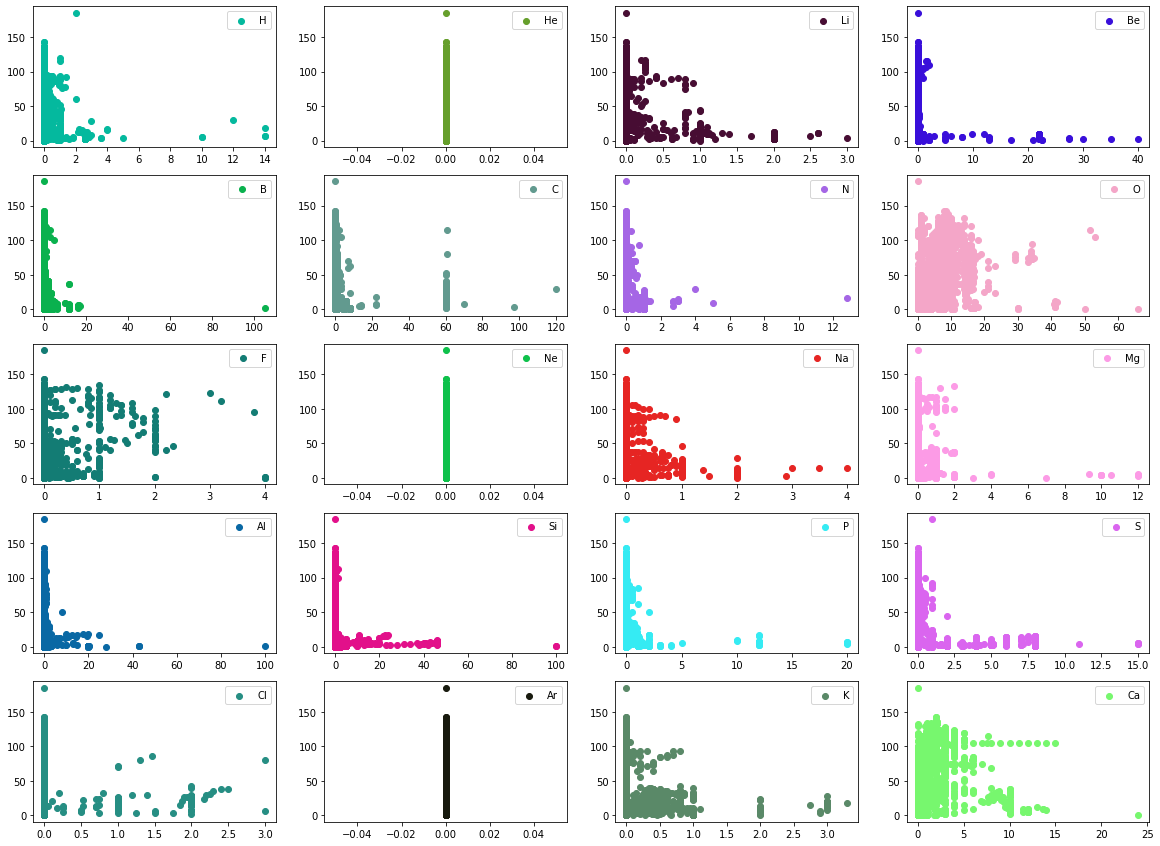

In [101]:
figure = plt.figure()

y_labels = pred_para
x_labels = comp
xl_size = len(x_labels)

figure.set_size_inches(20, 15)
xl_size = min(20, xl_size)

row_count,col_count = get_factors(xl_size)

for i in range(row_count):
  for j in range(col_count):
    if col_count*i + j >= xl_size:
      break
    label = x_labels[col_count*i + j]
    plt.subplot2grid((row_count, col_count), (i,j))
    plt.scatter(df_comp[label],temp, label=label, color=np.random.rand(3,))
    plt.legend(loc='upper right')

  if col_count*i + j >= xl_size:
      break
plt.show()

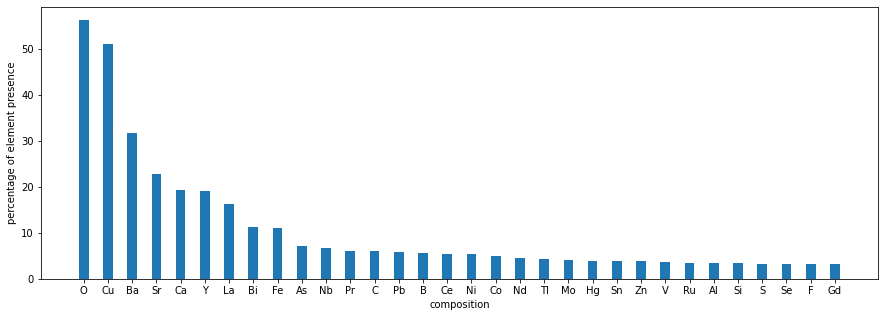

In [102]:
# element proportion graph

figure = plt.figure()
figure.set_size_inches(15, 5)

size = 32

y_label = "percentage of element presence"
x_label = comp[:]

values =[np.sum(x>0, axis=0)/float(x.shape[0]) for x in data_comp.T]
values, x_label = zip(*sorted(zip(values, x_label), reverse=True, key=lambda x:x[0]))
values = 100.0 * np.asarray(values)

plt.xlabel('composition')
plt.ylabel(y_label)
plt.bar(x_label[:size], values[:size], width=0.4)
plt.show()

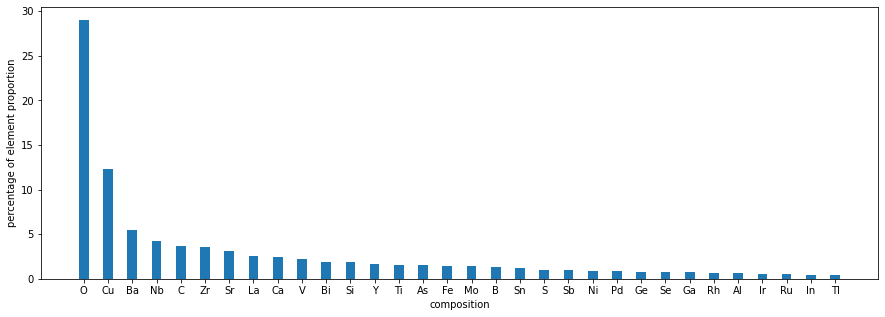

In [103]:
# element proportion graph

figure = plt.figure()
figure.set_size_inches(15, 5)

y_label = "percentage of element proportion"
x_label = comp[:]
amount = np.array([np.sum(x) for x in data_comp.T])
amount = amount/amount.sum()

amount, x_label = zip(*sorted(zip(amount, x_label), reverse=True, key=lambda x:x[0]))
amount = 100.0 * np.asarray(amount)

plt.xlabel('composition')
plt.ylabel(y_label)
# plt.subplot(122)
plt.bar(x_label[:size], amount[:size], width=0.4)
plt.show()

In [104]:
# mean critical temperature as per element

avg_temp = [0]*len(comp)
count    = [1]*len(comp)

for k, row in enumerate(data_comp):
  norm = sum(row)
  for i, val in enumerate(row):
    if val>0:
      avg_temp[i] += temp[k]
      count[i] += 1

avg_temp = np.asarray(avg_temp, dtype=np.float32)
count = np.asarray(count, dtype=np.float32)
avg_temp /= count
# avg_temp[avg_temp == 'nan'] = 0  

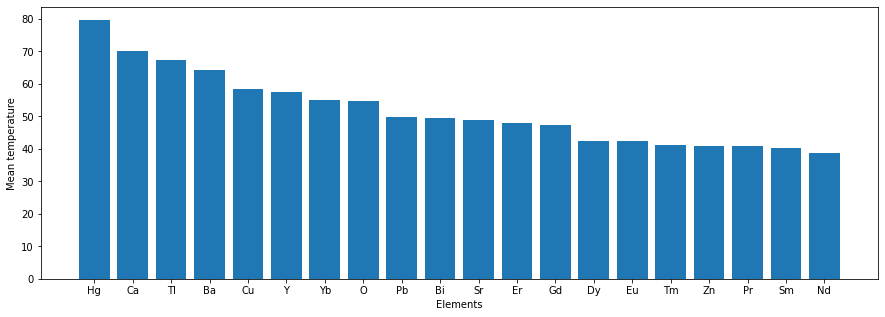

In [105]:
figure = plt.figure()
figure.set_size_inches(15, 5)

new_comp = []
new_avg_temp = []
for i in range(avg_temp.shape[0]):
  if avg_temp[i] != 'nan':
    new_avg_temp.append(avg_temp[i])
    new_comp.append(comp[i])

new_avg_temp, new_comp = zip(*sorted(zip(new_avg_temp, new_comp), reverse=1))

size = 20
plt.bar(new_comp[:size], new_avg_temp[:size])
plt.xlabel('Elements')
plt.ylabel('Mean temperature')
plt.show()

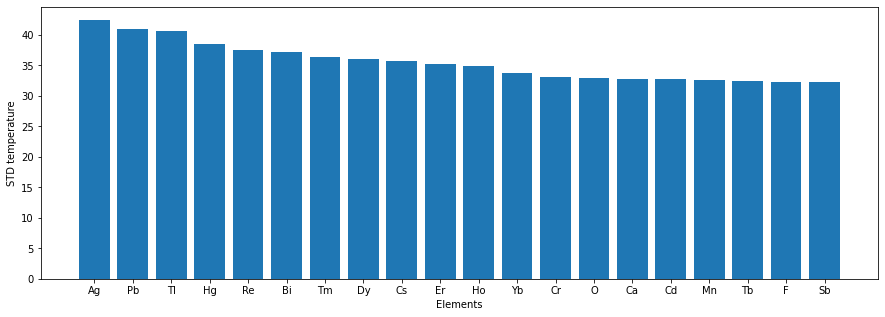

In [106]:
# mean critical temperature as per element

avg_temp_std = [[] for i in range(len(comp))]

for k, row in enumerate(data_comp):
  norm = sum(row)
  for i, val in enumerate(row):
    if val>0:
      avg_temp_std[i].append(temp[k])

std_value = []
new_comp = []
for i,val in enumerate(avg_temp_std):
  if len(val):
    std_value.append(np.array(val).std())
    new_comp.append(comp[i])

std_value, new_comp = zip(*sorted(zip(std_value, new_comp), reverse=1))

figure = plt.figure()
figure.set_size_inches(15, 5)

size = 20
plt.bar(new_comp[:size], std_value[:size])
plt.xlabel('Elements')
plt.ylabel('STD temperature')
plt.show()

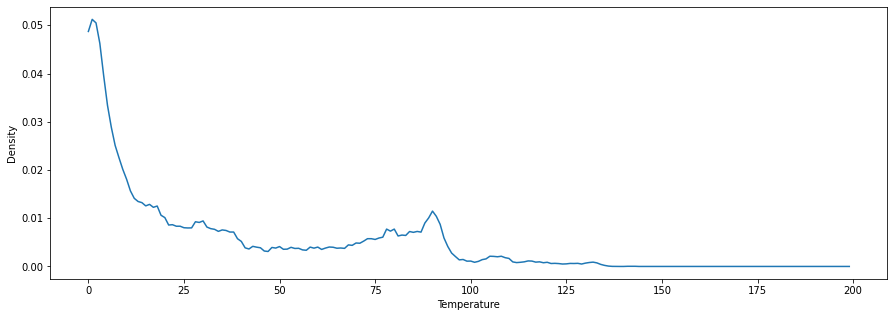

In [107]:
bins = np.array([0]*200, dtype=np.float64)

def mapping(a, bins, mins=0, maxs=200):
  n = len(bins)
  return int((n-1) * (a-mins)/(maxs-mins))

for k in range(data_comp.shape[0]):
  index = mapping(temp[k], bins)
  bins[index] += 1

figure = plt.figure()
figure.set_size_inches(15, 5)
bins = bins/bins.sum()

new_bins = np.zeros(bins.shape, dtype=np.float64)
for i in range(bins.shape[0]):
  if i == 0 or i == bins.shape[0]-1:
    new_bins[i] = bins[i]
  else:
    new_bins[i] = (bins[i-1] + bins[i] + bins[i+1])/3.0

plt.xlabel('Temperature')
plt.ylabel('Density')
plt.plot(new_bins)
plt.show()

In [137]:
# creating train and test dataset for training and testing purpose

# randomizing dataset
order = np.argsort(np.random.random(temp.shape))

# all_values = data_para[order]
all_values = np.hstack([data_para[order], data_comp[order]])
all_labels = temp[order]

# setting percentage of dataset for training and testing.
size = all_labels.shape[0]
train_per = 0.8
train = int(size * train_per)
test = size - train

# Training Set
train_labels = all_labels[:train]
train_values = all_values[:train]

# Testing Set
test_labels = all_labels[-test:]
test_values = all_values[-test:]

print('size of train data : ', train_values.shape)
print('size of train label: ', train_labels.shape)
print('size of test data  : ', test_values.shape)
print('size of test label : ', test_labels.shape)


size of train data :  (17010, 167)
size of train label:  (17010,)
size of test data  :  (4253, 167)
size of test label :  (4253,)


In [146]:
# preparing model to train dataset

kernel_init = initializers.RandomNormal(seed=0)

model = Sequential()
model.add(Dense(250, activation='relu', input_shape=(train_values.shape[1], ), kernel_initializer=kernel_init))
model.add(Dense(170, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(64, activation='relu', kernel_initializer=kernel_init))
model.add(Dense(1, kernel_initializer=kernel_init))

optimizer = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()
# visualizer(model, format='png', view=True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 250)               42000     
_________________________________________________________________
dense_45 (Dense)             (None, 170)               42670     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                10944     
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 95,679
Trainable params: 95,679
Non-trainable params: 0
_________________________________________________________________


In [147]:
# training the model over the dataset
class PrintEpNum(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '\r') # Updates current Epoch Number

EPOCHS = 2000

history = model.fit(train_values, train_labels, 
                    batch_size=train_values.shape[0], 
                    epochs=EPOCHS, verbose = False, 
                    validation_split=0.1, callbacks=[PrintEpNum()])


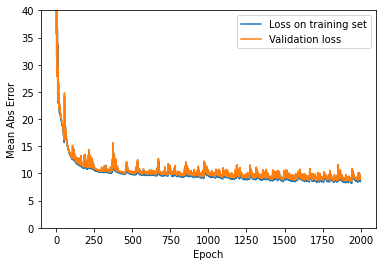

In [148]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['loss']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_loss']),label = 'Validation loss')
plt.ylim([0,40])
plt.legend()
plt.show()

In [149]:
# printing Mean Absolute Error over testing dataset
[loss, mae] = model.evaluate(test_values, test_labels, verbose=0)

print("Testing Set Mean Absolute Error: {:2.2f} GPa".format(mae))

Testing Set Mean Absolute Error: 9.03 GPa


In [150]:
# saving model
model.save(os.path.expanduser('~/model.h5'))

In [151]:
# testing model over test dataset
test_predictions = model.predict(test_values).flatten()

print("Real Values", list(test_labels))
print("Predictions", list(test_predictions))

values = np.concatenate((train_values, test_values), axis=0)
predictions = model.predict(values).flatten()

Real Values [7.2, 8.3, 46.0, 7.0, 19.8, 37.0, 50.03, 99.0, 0.58, 39.3, 31.6, 9.7, 116.0, 5.9, 77.0, 2.5, 52.6, 76.1, 132.72, 78.0, 20.0, 15.5, 42.8, 97.2, 25.5, 83.5, 21.8, 6.2, 79.5, 11.2, 16.65, 27.0, 6.2, 56.0, 79.1, 21.5, 42.0, 1.6, 79.4, 17.8, 11.7, 66.0, 33.0, 6.2, 11.5, 10.3, 13.5, 30.0, 30.0, 25.0, 0.158, 68.6, 103.0, 37.2, 11.7, 132.0, 1.92, 2.39, 86.0, 1.2, 19.7, 87.0, 1.87, 2.58, 107.5, 85.0, 20.6, 70.0, 37.2, 1.38, 19.0, 8.28, 33.5, 73.9, 5.935, 14.1, 135.0, 74.0, 91.6, 2.2, 7.4, 9.96, 21.9, 135.0, 93.6, 2.47, 38.25, 85.5, 59.0, 21.7, 19.7, 24.0, 4.405, 40.1, 23.3, 12.9, 6.4, 90.0, 49.0, 91.09, 16.0, 11.8, 50.08, 92.0, 48.9, 10.1, 7.2, 2.2, 34.9, 37.0, 10.2, 27.8, 72.0, 117.0, 3.845, 24.0, 9.1, 26.25, 7.05, 18.3, 30.0, 125.0, 9.275, 4.2, 5.0, 9.25, 79.7, 1.5, 74.1, 2.11, 18.0, 8.6, 90.0, 7.25, 105.0, 13.7, 2.3, 75.0, 2.52, 0.68, 3.05, 24.0, 10.7, 50.3, 0.5329999999999999, 54.0, 9.48, 7.0, 1.62, 1.42, 91.26, 37.3, 7.1, 7.1, 109.05, 6.2, 98.0, 96.0, 80.0, 86.2, 1.56, 2.44, 17

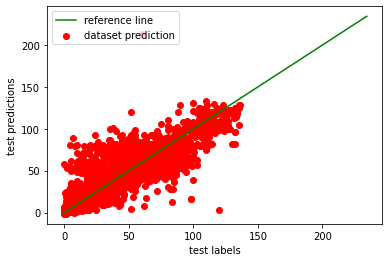

In [152]:
# ploting prediction over actual to visualize the model accuracy
xy = np.linspace(min(test_predictions)*0.9, max(test_predictions)*1.1, 3)

plt.plot(xy, xy, c='green', label='reference line')
plt.scatter(test_labels, test_predictions, c='red', label='dataset prediction')
plt.xlabel('test labels')
plt.ylabel('test predictions')
plt.legend(loc='upper left')
plt.show()